1. Data Understanding & Exploration: [5 Marks]
<br>A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]
<br>B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]
<br>C. Merge both the DataFrames together to form a single DataFrame [2 Mark]
<br>D. Print 5 point summary of the numerical features and share insights. [1 Marks]
<br> Import required libraries

In [350]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore
from sklearn import svm
#import sklearn.metrics


1.A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [314]:
carnames = pd.read_csv("Car name.csv")
carnames.dtypes
carnames.shape

(398, 1)

2B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [315]:

# Python program to convert
# JSON file to CSV

import json
import csv
# Opening JSON file and loading the data
# into the variable data
with open('Car-Attributes.json') as json_file:
	data = json.load(json_file)

#employee_data = data['emp_details']

# now we will open a file for writing
data_file = open('CarAttrb.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing 
# headers to the CSV file
count = 0

for emp in data:
	if count == 0:

		# Writing headers of CSV file
		header = emp.keys()
		csv_writer.writerow(header)
		count += 1

	# Writing data of CSV file
	csv_writer.writerow(emp.values())

data_file.close()
carattrb = pd.read_csv("CarAttrb.csv")
carattrb.dtypes


mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

1C.Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [316]:
carsdata=carnames.merge(carattrb,how='inner',left_index=True,right_index=True)

In [317]:
carsdata.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [318]:
carsdata.info()
carsdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1D.Insights: 
<br>1.It can be observed that hp(Horse Power) which should be Float column showing up as String.
<br>2.Origin Columns which shows the origin of car , shows values in 1, 2, 3 for origin in America(1), Europe(2),Asia(3) which is not correct as it forces an ordering among origin so it should be replaced with dummy values.


### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [319]:
# Also replacing the categorical var with actual values
carsdata['origin'] = carsdata['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
carsdata.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,america
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,america
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,america
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,america
4,ford torino,17.0,8,302.0,140,3449,10.5,70,america


In [320]:
carsdata = pd.get_dummies(carsdata, columns=['origin'])
carsdata['origin_america']=carsdata['origin_america'].astype('int64')
carsdata['origin_asia']=carsdata['origin_asia'].astype('int64')
carsdata['origin_europe']=carsdata['origin_europe'].astype('int64')
#cData =pd.get_dummies(cData,columns=['origin'])
carsdata.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,0,0


### Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.

## Dealing with Missing Values

Part 1.2A - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [321]:
carsdata.describe()

,mpg,cyl,disp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [322]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
carsdata.dtypes
carsdata['hp'].value_counts()

hp
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [323]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(carsdata.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
carsdata[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [324]:
#instead of dropping the rows, lets replace the missing values with median value. 
carsdata.loc[carsdata[hpIsDigit['hp'] == False].index,'hp']=carsdata[hpIsDigit['hp'] == True]['hp'].median()


Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.
Feature wise percentage ofr missing values:0%

In [325]:
txt = "Feature:{f}    missing values:{val}"
for i in range(len(carsdt.columns)): 
    print(txt.format(f=carsdt.isna().sum().index[i],val=str(carsdt.isna().sum()[i])+"%"))


Feature:mpg    missing values:0%
Feature:cyl    missing values:0%
Feature:disp    missing values:0%
Feature:hp    missing values:0%
Feature:wt    missing values:0%
Feature:acc    missing values:0%
Feature:yr    missing values:0%
Feature:origin_america    missing values:0%
Feature:origin_asia    missing values:0%
Feature:origin_europe    missing values:0%
Feature:GROUP    missing values:0%
Feature:GROUP1    missing values:0%
Feature:GROUP2    missing values:0%


In [326]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())
#carsdt= carsdata.iloc[:,1:]
medianFiller = lambda x: x.fillna(x[x.isna()==False].median())
carsdt = carsdt.apply(medianFiller,axis=0)
#cData[hpIsDigit['horsepower'] == False] 
carsdt['hp'] = carsdt['hp'].astype('float64')  # converting the hp column from object / string type to float

### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.:0

In [327]:
carsdt.duplicated().sum()

0

### Part 1.2 c - Plot a pairplot for all features.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


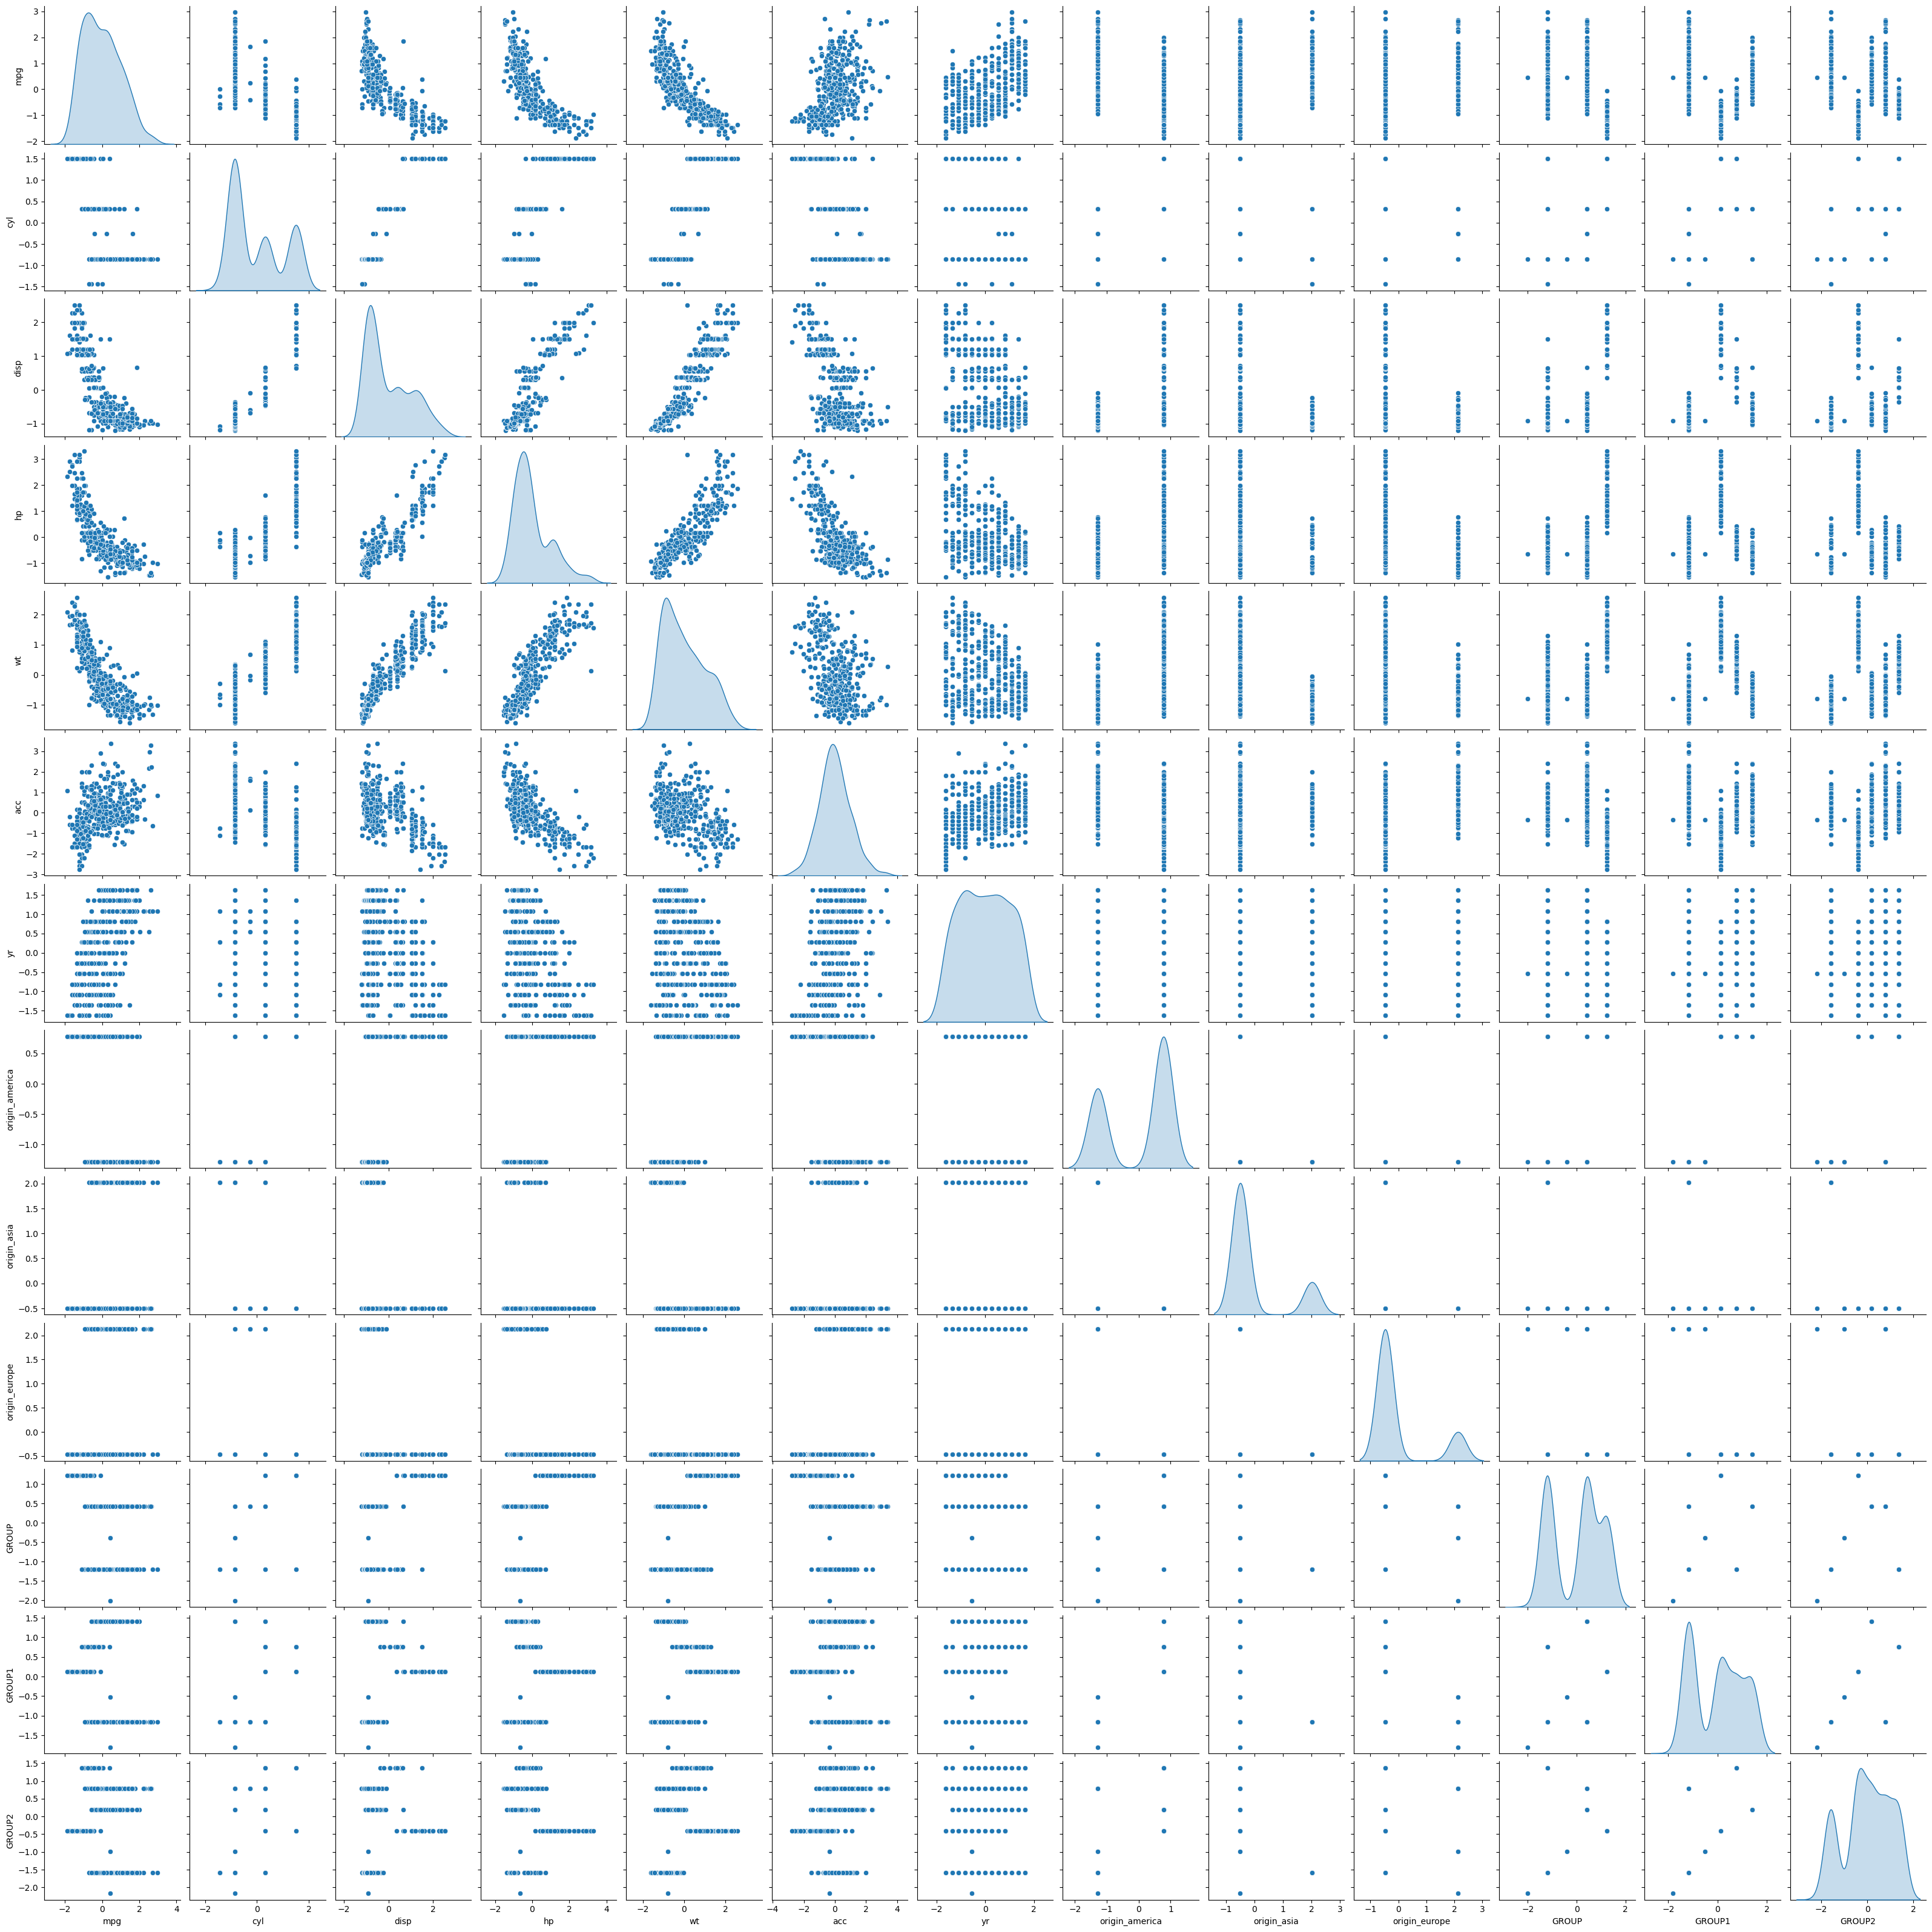

In [328]:

carsdtScaled=carsdt.apply(zscore)
sns.pairplot(carsdtScaled,diag_kind='kde')


### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<Axes: xlabel='wt', ylabel='disp'>

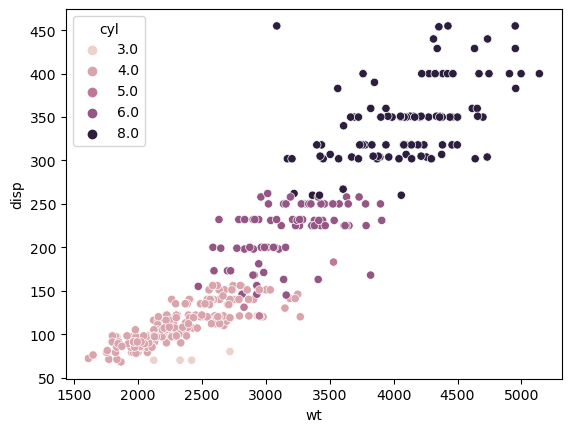

In [329]:
sns.scatterplot(data=carsdt,x='wt',y='disp',hue='cyl')

### Part 1.2 e - Share insights for Q2.d.

<br>1.The relation between wt and disp seems linear and is directly related. The displacement is low for lower values of weight.
<br>2.The relation between wt and cyl seems directly related. When weight is low the no of cylinders is low , and when weight is , the no of cylinders also high.

### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<Axes: xlabel='wt', ylabel='mpg'>

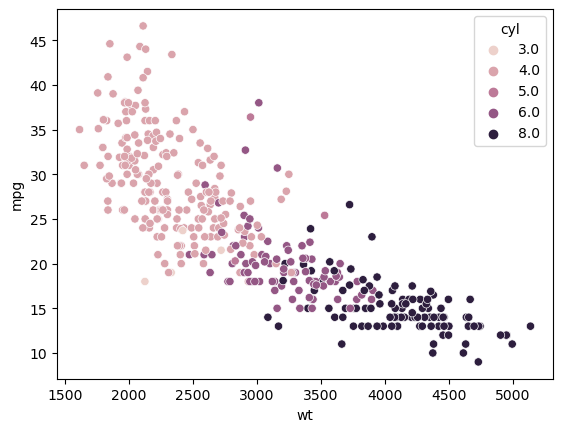

In [331]:
sns.scatterplot(data=carsdt,x='wt',y='mpg',hue='cyl')

### Part 1.2 g- Share insights for Q2.f.

<br>1.The relation between mpg and wt is not linear and is inversely related. The mpg reduces as the weight of the vehicle increases
<br>2.The relation between mpg and cyl is not linear and is inversely related. For smaller values of cylinders mpg is high; reduces when no of cylinders increase.

### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

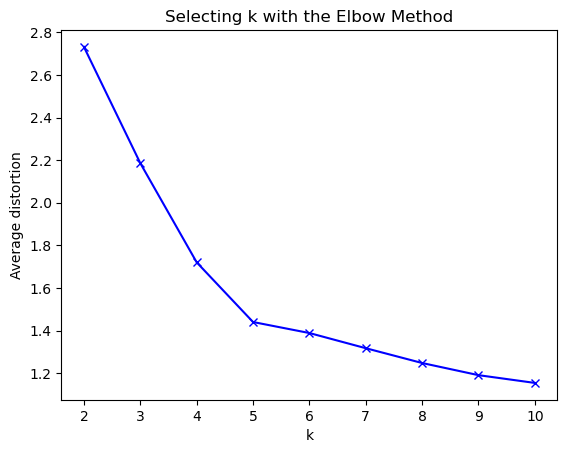

In [332]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(carsdtScaled)
    prediction=model.predict(carsdtScaled)
    meanDistortions.append(sum(np.min(cdist(carsdtScaled, model.cluster_centers_, 'euclidean'), axis=1)) / carsdtScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Part 1.3 c - On the above visual, highlight which are the possible Elbow points.

The K values of 4,5,6 can be a possible Elbow points.

### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [333]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(carsdtScaled)
prediction=final_model.predict(carsdtScaled)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [334]:
# Let us first start with K = 5
final_model1=KMeans(5)
final_model1.fit(carsdtScaled)
prediction1=final_model1.predict(carsdtScaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [335]:
# Let us first start with K = 6
final_model2=KMeans(6)
final_model2.fit(carsdtScaled)
prediction2=final_model2.predict(carsdtScaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [336]:
#Append the prediction 
carsdt["GROUP"] = prediction
carsdtScaled["GROUP"] = prediction
carsdt["GROUP1"] = prediction1
carsdtScaled["GROUP1"] = prediction1
carsdt["GROUP2"] = prediction2
carsdtScaled["GROUP2"] = prediction2
print("Groups Assigned : \n")
carsdt.sample(20)
#carsdata["GROUP"].unique()


Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,GROUP,GROUP1,GROUP2
315,24.3,4.0,151.0,90.0,3003.0,20.1,80.0,1.0,0.0,0.0,0,0,1
355,33.7,4.0,107.0,75.0,2210.0,14.4,81.0,0.0,1.0,0.0,1,3,2
180,25.0,4.0,121.0,115.0,2671.0,13.5,75.0,0.0,0.0,1.0,2,4,4
240,30.5,4.0,97.0,78.0,2190.0,14.1,77.0,0.0,0.0,1.0,2,4,4
69,12.0,8.0,350.0,160.0,4456.0,13.5,72.0,1.0,0.0,0.0,3,1,0
248,36.1,4.0,91.0,60.0,1800.0,16.4,78.0,0.0,1.0,0.0,1,3,2
306,28.8,6.0,173.0,115.0,2595.0,11.3,79.0,1.0,0.0,0.0,0,0,1
176,19.0,6.0,232.0,90.0,3211.0,17.0,75.0,1.0,0.0,0.0,0,2,5
318,29.8,4.0,134.0,90.0,2711.0,15.5,80.0,0.0,1.0,0.0,1,3,2
141,29.0,4.0,98.0,83.0,2219.0,16.5,74.0,0.0,0.0,1.0,2,4,4


### Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

In [337]:
from mpl_toolkits.mplot3d import Axes3D
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
final_model2.fit(carsdtScaled)
labels = final_model2.labels_
ax.scatter(carsdtScaled.iloc[:, 0], carsdtScaled.iloc[:, 1], carsdtScaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 800x600 with 0 Axes>

### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.We can see K-means  predicted same group for the new data point, which is correct

Add a new row which has similar values(+1 for each of the values of big scale except cylinders) to row index 143 and see what is the group predicted for this row :It should be same as the old row as values are almost same.

In [340]:
c#arsdtScaled.loc[len(carsdtScaled.index)] = [27.0 ,4 ,98.0 ,79 ,2301 ,14.6 ,74 ,0 ,0 ,1,-1,-1,-1] 
carsdt.loc[len(carsdt.index)] = [27.0 ,4 ,98.0 ,79 ,2301 ,14.6 ,74 ,0 ,0 ,1,-1,-1,-1] 
carsdtScaled.iloc[len(carsdtScaled.index)]=carsdt.iloc[398].apply(zscore)

NameError: name 'c' is not defined

In [341]:
final_model.fit(carsdtScaled)
prediction=final_model.predict(carsdtScaled)
final_model1.fit(carsdtScaled)
prediction1=final_model1.predict(carsdtScaled)
final_model2.fit(carsdtScaled)
prediction2=final_model2.predict(carsdtScaled)
carsdt["GROUP"] = prediction
carsdtScaled["GROUP"] = prediction
carsdt["GROUP1"] = prediction1
carsdtScaled["GROUP1"] = prediction1
carsdt["GROUP2"] = prediction2
carsdtScaled["GROUP2"] = prediction2
print("Groups Assigned : \n")
carsdt.sample(20)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,GROUP,GROUP1,GROUP2
204,32.0,4.0,85.0,70.0,1990.0,17.0,76.0,0.0,1.0,0.0,3,3,2
12,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,0.0,0.0,0,1,1
172,25.0,4.0,90.0,71.0,2223.0,16.5,75.0,0.0,0.0,1.0,1,0,3
350,34.7,4.0,105.0,63.0,2215.0,14.9,81.0,1.0,0.0,0.0,2,2,5
124,11.0,8.0,350.0,180.0,3664.0,11.0,73.0,1.0,0.0,0.0,0,1,1
318,29.8,4.0,134.0,90.0,2711.0,15.5,80.0,0.0,1.0,0.0,3,3,2
151,31.0,4.0,79.0,67.0,2000.0,16.0,74.0,0.0,0.0,1.0,1,0,3
259,20.8,6.0,200.0,85.0,3070.0,16.7,78.0,1.0,0.0,0.0,2,2,0
283,20.2,6.0,232.0,90.0,3265.0,18.2,79.0,1.0,0.0,0.0,2,2,0
301,34.2,4.0,105.0,70.0,2200.0,13.2,79.0,1.0,0.0,0.0,2,2,5


In [342]:
carsdt.iloc[[143,398]]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,GROUP,GROUP1,GROUP2
143,26.0,4.0,97.0,78.0,2300.0,14.5,74.0,0.0,0.0,1.0,1,0,3
398,27.0,4.0,98.0,79.0,2301.0,14.6,74.0,0.0,0.0,1.0,1,0,3


### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [343]:
vehicles = pd.read_csv("vehicle.csv")
vehicles.dtypes
#vehicles.shape

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### Part 2.1 b- Check percentage of missing values and impute with correct approach.

In [344]:
txt = "{f:<27}{val:>15.2f}"
total =vehicles.isna().sum().sum()
for i in range(len(vehicles.columns)): 
    print(txt.format(f=vehicles.isna().sum().index[i],val=(vehicles.isna().sum()[i]/total)*100))
    



compactness                           0.00
circularity                          12.20
distance_circularity                  9.76
radius_ratio                         14.63
pr.axis_aspect_ratio                  4.88
max.length_aspect_ratio               0.00
scatter_ratio                         2.44
elongatedness                         2.44
pr.axis_rectangularity                7.32
max.length_rectangularity             0.00
scaled_variance                       7.32
scaled_variance.1                     4.88
scaled_radius_of_gyration             4.88
scaled_radius_of_gyration.1           9.76
skewness_about                       14.63
skewness_about.1                      2.44
skewness_about.2                      2.44
hollows_ratio                         0.00
class                                 0.00


In [377]:
type(vehicles.isna().sum().sum())
vehiclesdt=vehicles.drop(['class'], axis=1)
vehiclesdt=
#x.isna()==False].median()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


In [379]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())
#carsdt= carsdata.iloc[:,1:]
#vehiclesdt[vehiclesdt.isna()==False].median()
medianFiller = lambda x: x.fillna(x[x.isna()==False].median())
vehiclesdt = vehiclesdt.apply(medianFiller,axis=0)
#cData[hpIsDigit['horsepower'] == False] 
#vehicles['hp'] = vehicles['hp'].astype('float64')  # converting the hp column from object / string type to float

In [391]:
vehiclesdt.isna().sum().sum()

0

In [401]:
vehiclesdtScaled=vehiclesdt.apply(zscore)

### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

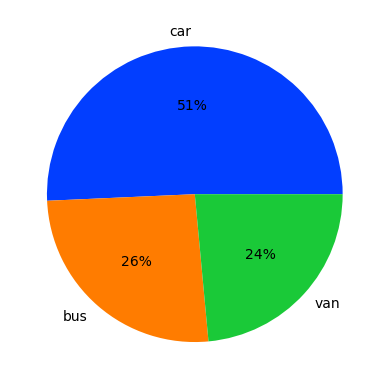

50.70921985815603


In [380]:
palette_color = sns.color_palette('bright')
data=vehiclesd['class'].value_counts()
plt.pie(data.values,labels=data.index, colors=palette_color, autopct='%.0f%%')
plt.show()
print((vehicles['class'].value_counts()['car']/vehicles['class'].value_counts().sum())*100)


### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.:0 duplicates

In [402]:
vehiclesdtScaled.duplicated().sum()

0

In [422]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet['class'][x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

### Part 2.2 a - Split data into X and Y.

In [403]:
# lets build our linear model
# independant variables
X = vehiclesdtScaled
# the dependent variable
y = vehicles[['class']]

### Part 2.2 b - Standardize the Data.

In [404]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Part 2.3 a - Train a base Classification model using SVM.

In [421]:
clf = svm.SVC(gamma=0.025, C=3)   
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'bus', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'van',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'car', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'van', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'car', 'van', 'car', 'car',
       'van', 'car',

### Part 2.3 b - Print Classification metrics for train data.

In [438]:
#getAccuracy(y_test , y_pred)
correct = 0
print(len(y_test))
lst=y_test['class'].index

for x in range(len(lst)):
    #print(x)
    if y_test['class'][lst[i]]== y_pred[x]:
        correct += 1
print((correct/float(len(y_test))) * 100.0)


254
51.96850393700787


In [435]:
lst=y_test['class'].index
y_test['class'][lst[2]]

'bus'

### Part 2.3 c - Apply PCA on the data with 10 components.

In [439]:
covMatrix = np.cov(vehiclesdtScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [442]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(vehiclesdtScaled)

PCA(n_components=10)

### Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

In [443]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [444]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [445]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


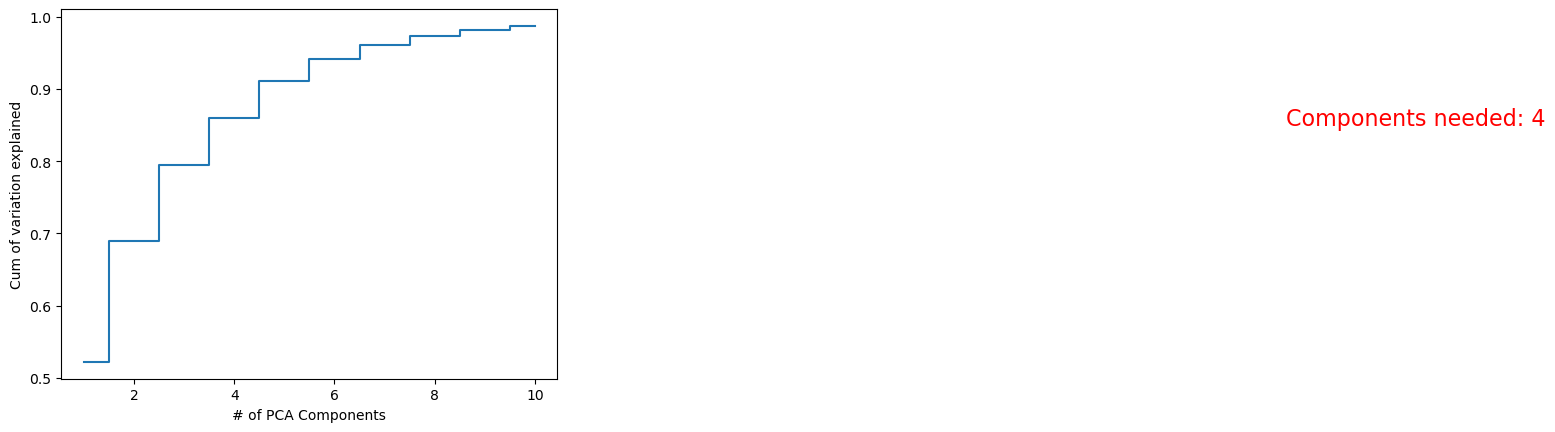

In [448]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

### Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

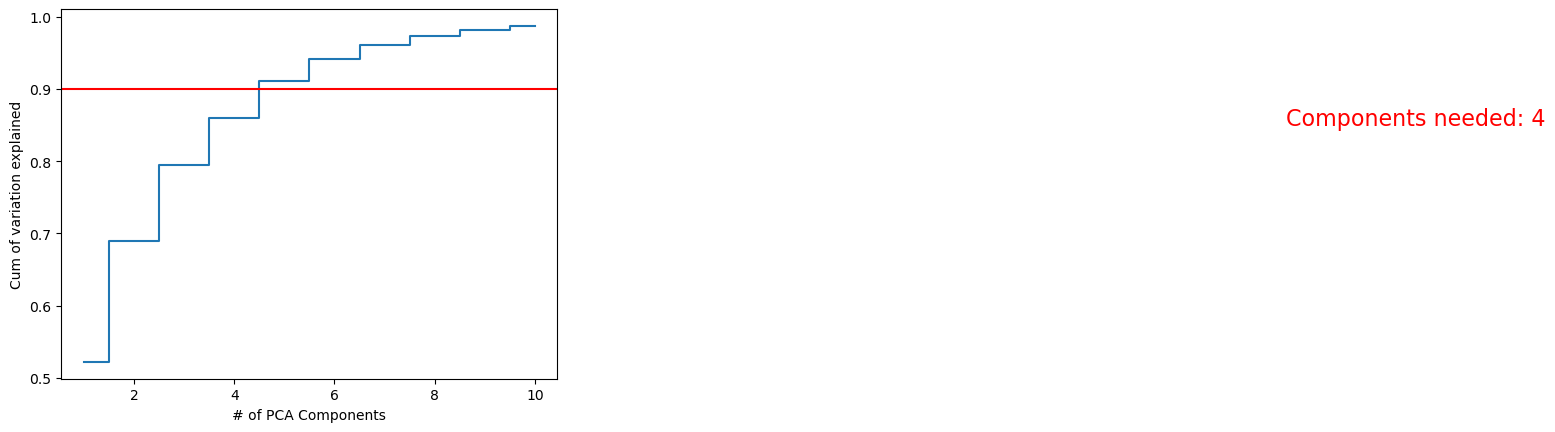

In [449]:

plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

### Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

Min components needed from above graph =4

### Part 2.3 g - Train SVM model on components selected from above step.

In [458]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Pipeline with PCA and SVM
clf = Pipeline([
    ("pca",PCA(n_components=4)),
    ("svm",SVC(C=10,kernel='rbf')),
])
  
#Training the data
clf.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('pca', PCA(n_components=4)), ('svm', SVC(C=10))])

### Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [460]:
from sklearn.metrics import classification_report
# score of testing data
print("Score is:",clf.score(X_test,y_test))
  
# precision recall f1-score support report
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classificaion Report")
print(report)

Score is: 0.8188976377952756
Classificaion Report
              precision    recall  f1-score   support

         bus       0.82      0.78      0.80        59
         car       0.88      0.83      0.86       133
         van       0.71      0.82      0.76        62

    accuracy                           0.82       254
   macro avg       0.80      0.81      0.81       254
weighted avg       0.82      0.82      0.82       254



### Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [461]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Pipeline with PCA and SVM
clf = Pipeline([
    ("pca",PCA(n_components=5)),
    ("svm",SVC(C=10,kernel='rbf')),
])
  
#Training the data
clf.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('pca', PCA(n_components=5)), ('svm', SVC(C=10))])

### Part 2.4 b- Share best Parameters observed from above step.

Increase in components improved performance to a little extent

### Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [463]:
from sklearn.metrics import classification_report
# score of testing data
print("Score is:",clf.score(X_test,y_test))
  
# precision recall f1-score support report
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classificaion Report")
print(report)

Score is: 0.8228346456692913
Classificaion Report
              precision    recall  f1-score   support

         bus       0.90      0.75      0.81        59
         car       0.86      0.86      0.86       133
         van       0.69      0.81      0.75        62

    accuracy                           0.82       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.83      0.82      0.82       254



### Part 2.5 a - Explain pre-requisite/assumptions of PCA.

1. PCA assumes a correlation between features.
2. PCA is sensitive to the scale of the features.
3. PCA is not robust against outliers.
4. The algorithm is not well suited to capturing non-linear relationships.

### Part 2.5 b - Explain advantages and limitations of PCA.

Advantages:

PCA reduces the curse of dimensionality. PCA lower the dimensions of the training dataset, which prevents the predictive algorithms from overfitting.
Principal components are independent of each other, so removes correlated features.
Reduction of noise since the maximum variation basis is chosen and so the small variations in the background are ignored automatically.

Disadvantages:
Even Though PCA covers maximum variance amid data features, sometimes it may skip a bit of information in comparison to the actual list of features.
Implementing PCA over datasets leads to transforming actual features in principal components that are linear combinations of actual features, therefore principle components are difficult to read or interpret as compared to actual features.
Data must be standardized before implementing PCA, else optimal PCA’s can’t be found.